<a href="https://colab.research.google.com/github/ElviraKonovalov/soen471-bigData/blob/main/project_data_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Insight into the nature of road collisions**

---


## Imports

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.under_sampling import NearMiss 

# Inital Dataset Analysis

---


The original dataset consists of 16,860 observations of motor vehicle collisions from 2006 to 2020 and is composed of 54 numerical and categorical features.

In [105]:
file = 'Motor Vehicle Collisions with KSI Data.csv'
df=  pd.read_csv(file, sep=',');

In [106]:
df

,ACCLASS,ACCLOC,ACCNUM,AG_DRIV,ALCOHOL,AUTOMOBILE,CYCACT,CYCCOND,CYCLIST,CYCLISTYPE,...,TIME,TRAFFCTL,TRSN_CITY_VEH,TRUCK,VEHTYPE,VISIBILITY,WARDNUM,YEAR,_id,geometry
0,Fatal,At Intersection,892658,Yes,NaN,Yes,NaN,NaN,NaN,NaN,...,852,Traffic Signal,NaN,NaN,"Automobile, Station Wagon",Clear,4,2006,1,"{'type': 'Point', 'coordinates': (-79.45249, 4..."
1,Fatal,At Intersection,892658,Yes,NaN,Yes,NaN,NaN,NaN,NaN,...,852,Traffic Signal,NaN,NaN,Other,Clear,4,2006,2,"{'type': 'Point', 'coordinates': (-79.45249, 4..."
2,Fatal,At Intersection,892810,Yes,NaN,Yes,NaN,NaN,NaN,NaN,...,915,Traffic Signal,NaN,NaN,Motorcycle,Clear,25,2006,3,"{'type': 'Point', 'coordinates': (-79.199786, ..."
3,Fatal,At Intersection,892810,Yes,NaN,Yes,NaN,NaN,NaN,NaN,...,915,Traffic Signal,NaN,NaN,"Automobile, Station Wagon",Clear,25,2006,4,"{'type': 'Point', 'coordinates': (-79.199786, ..."
4,Fatal,NaN,892682,NaN,Yes,Yes,NaN,NaN,NaN,NaN,...,240,No Control,NaN,NaN,"Automobile, Station Wagon",Clear,"21,20",2006,5,"{'type': 'Point', 'coordinates': (-79.25619, 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,Non-Fatal Injury,Non Intersection,1636966,Yes,NaN,Yes,Driving Properly,Normal,Yes,NaN,...,1340,No Control,NaN,NaN,Bicycle,Clear,NaN,2020,16856,"{'type': 'Point', 'coordinates': (-79.238926, ..."
16856,Non-Fatal Injury,At Intersection,1650701,Yes,NaN,Yes,NaN,NaN,NaN,NaN,...,1205,Traffic Signal,NaN,NaN,"Automobile, Station Wagon",Clear,"21,20",2020,16857,"{'type': 'Point', 'coordinates': (-79.232021, ..."
16857,Non-Fatal Injury,At Intersection,1650701,Yes,NaN,Yes,NaN,NaN,NaN,NaN,...,1205,Traffic Signal,NaN,NaN,"Automobile, Station Wagon",Clear,"21,20",2020,16858,"{'type': 'Point', 'coordinates': (-79.232021, ..."
16858,Non-Fatal Injury,At Intersection,1650701,Yes,NaN,Yes,NaN,NaN,NaN,NaN,...,1205,Traffic Signal,NaN,NaN,NaN,Clear,"21,20",2020,16859,"{'type': 'Point', 'coordinates': (-79.232021, ..."


## Class Distribution
The feature *'ACCLASS'* (accident class) is the dependent feature that will classify the outcome of the accident.<br>
There are two types of accident outcomes: Fatal Accident or Non-Fatal Accident.


In [107]:
df['ACCLASS'].value_counts()
df['ACCLASS'] = df['ACCLASS'].replace(['Property Damage Only', 'Non-Fatal Injury'], 'Non-Fatal' )
df['ACCLASS'].value_counts()

Non-Fatal    14563
Fatal         2297
Name: ACCLASS, dtype: int64

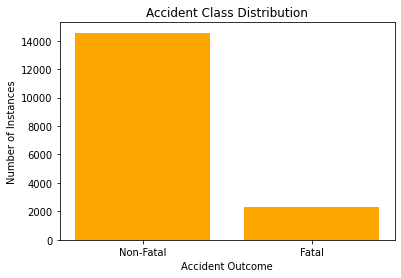

In [109]:
class_counts = df['ACCLASS'].value_counts()
classes = class_counts.index.tolist()
class_instance_count = class_counts.values
plt.bar(classes,class_instance_count, color='orange')
plt.title('Accident Class Distribution')
plt.xlabel('Accident Outcome')
plt.ylabel('Number of Instances');

**NOTE!**<br>
Class distribution appears to be very unbalanced. Classes are not equally represented. Methods such as oversampling or undersampling will be used to address this issue.

# **Data Preparation**
Data is prepared to be applied to the models.




---







## Feature Selection
From the original 54 features, irrelevant and redundant variables were dropped, and new features were constructed.<br>
The following 25 features were chosen to be used in this study:
- **'AG_DRIV':** Aggressive and Distracted Driving Collision
- **'ALCOHOL':** Alcohol Related Collision
- **'AUTOMOBILE':** Driver Involved in Collision
- **'CYCLIST':** Cyclists Involved in Collision
- **'MONTH':** Month Collision Occurred
- **'DISABILITY':** Medical or Physical Disability Related Collision
- **'EMERG_VEH':** Emergency Vehicle Involved in Collision
- **'HOOD_ID':** City of Toronto Neighbourhood Identifier
- **'HOUR':** Hour Collision Occurred
- **'INITDIR':** Initial Direction of Travel
- **'INVAGE':** Age of Involved Party
- **'LIGHT':** Light Condition
- **'LOCCOORD':** Location Coordinate
- **'MANOEUVER':** Vehicle Manouever
- **'MOTORCYCLE':** Motorcyclist Involved in Collision
- **'PASSENGER':** Passenger Involved in Collision
- **'PEDESTRIAN':** Pedestrian Involved In Collision
- **'RDSFCOND':** Road Surface Condition
- **'REDLIGHT':** Red Light Related Collision
- **'ROAD_CLASS':** Road Classification
- **'SPEEDING':** Speeding Related Collision
- **'TRAFFCTL':** Traffic Control Type
- **'TRSN_CITY_VEH':** Transit or City Vehicle Involved in Collision
- **'TRUCK':** Truck Driver Involved in Collision
- **'VISIBILITY':** Environment Condition


**NOTE!** <br>
Experimentation with "feature importances" is done in the next section to potentially further reduce the number the features.


### DROPPING COLUMNS
We start by dropping the columns that we deem not pertinent for our model.

In [154]:
file = 'Motor Vehicle Collisions with KSI Data.csv'
df=  pd.read_csv(file, sep=',');

In [155]:
columns_to_drop = ['_id', 'ACCNUM', 'TIME', 'OFFSET', 'WARDNUM', 'DIVISION', 'ACCLOC', 'FATAL_NO', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'POLICE_DIVISION', 'ObjectId', 'geometry','DISTRICT','DRIVACT','DRIVCOND','IMPACTYPE','INJURY','NEIGHBOURHOOD','STREET1', 'STREET2','VEHTYPE','YEAR']
df = df.drop(columns=columns_to_drop)

### FILTERING
Second, since we're only interested in the classification for the driver, we filter all the rows that did not have a driver as involved party. Then since our data only contains drivers, the INVTYPE feature is redudant and we drop it.

In [156]:
df.INVTYPE.fillna('Unknown', inplace=True)

for row in df.INVTYPE.unique():
  if 'Driver' not in row or 'Not Hit' in row:
    df = df[(df.INVTYPE != row)]

df.drop(columns=['INVTYPE'], inplace=True)

### REPLACING BINARY VALUES

The following features have been noted to have a binary value; either "Yes" or "null", therefore, for each we map the values to 1 and 0 respectively.

In [157]:
df.AG_DRIV.fillna(0, inplace=True)
df.AG_DRIV.replace('Yes', 1, inplace=True)

df.ALCOHOL.fillna(0, inplace=True)
df.ALCOHOL.replace('Yes', 1, inplace=True)

df.AUTOMOBILE.fillna(0, inplace=True)
df.AUTOMOBILE.replace('Yes',1, inplace=True)

df.CYCLIST.fillna(0, inplace=True)
df.CYCLIST.replace('Yes',1, inplace=True)

df.DISABILITY.fillna(0, inplace=True)
df.DISABILITY.replace('Yes', 1, inplace=True)

df.EMERG_VEH.fillna(0, inplace=True)
df.EMERG_VEH.replace('Yes',1, inplace=True)

df.PEDESTRIAN.fillna(0, inplace=True)
df.PEDESTRIAN.replace('Yes',1, inplace=True)

df.PASSENGER.fillna(0, inplace=True)
df.PASSENGER.replace('Yes',1, inplace=True)

df.MOTORCYCLE.fillna(0, inplace=True)
df.MOTORCYCLE.replace('Yes',1, inplace=True)

df.REDLIGHT.fillna(0, inplace=True)
df.REDLIGHT.replace('Yes', 1, inplace=True)

df.SPEEDING.fillna(0, inplace=True)
df.SPEEDING.replace('Yes', 1, inplace=True)

df.TRSN_CITY_VEH.fillna(0, inplace=True)
df.TRSN_CITY_VEH.replace('Yes', 1, inplace=True)

df.TRUCK.fillna(0, inplace=True)
df.TRUCK.replace('Yes', 1, inplace=True)

Similarly, ACCLASS, representing the class of the accident is reduced to only 2 values, we represent fatal ones by 1 and non-fatal ones by 0.

In [158]:
df.ACCLASS.replace(['Fatal'], 1, inplace=True)
df.ACCLASS.replace(['Non-Fatal Injury', 'Property Damage Only'], 0, inplace=True)

### RENAMING AND GROUPING
We now group certain information together be renaming it to a common value.<br><br>
We have decided that we didn't have to be too precise with the date, and that the month would suffice. Our assumption is that the occurence of accidents can be related to the holidays and the different weather conditions through the year.

In [159]:
#first we will have to convert the data type to DateTime
df['DATE'] = pd.to_datetime(df['DATE'])

#now we will transform the data in the DATE column to simply present the month in integer form
df['DATE'] = df['DATE'].dt.month

Next, Every street owned by the City of Toronto has been given one of five classifications (with the exception of public laneways): Local road, Collector road, Minor arterial road, Major arterical road and Expressway
https://www.toronto.ca/services-payments/streets-parking-transportation/traffic-management/road-classification-system/about-the-road-classification-system/

Therefore, to simplify our dataset, we renamed our values such that they fall into one the of the 5 classes. Additionally, to fill in null values we have selected the most frequent road class and we have droppend roads that were classed as "Pending" as they might fall into an outlier category of roads which don't fall exactly into one of the 5 classes.

In [160]:
df['ROAD_CLASS'] = df['ROAD_CLASS'].fillna(df['ROAD_CLASS'].value_counts().index[0])
# drop rows where ROAD_CLASS is pending
df.drop(df.index[df['ROAD_CLASS'] == 'Pending'], inplace=True)
# replacing Expressway Ramp (4 rows) with Expressway
df['ROAD_CLASS'] = df['ROAD_CLASS'].replace(['Expressway Ramp'],'Expressway')
# Major Arterial Ramp (1 row) with Major Arterial
df['ROAD_CLASS'] = df['ROAD_CLASS'].replace(['Major Arterial Ramp'],'Major Arterial')

We also group traffic control into 3 categories, namely: "Active Control", "Passive Control" and "No Control".
Active Control refers to traffic being controlled by a person such as a police officer, school guard or traffic controller.
Passive Control refers to traffic being controlled by a road sign such as a Stop sign or traffic signals.
No Control refers to traffic deprived of any control mechanism.

Our assumption for null values is that there must be a high probability of some form of passive control such as a road sign.

In [161]:
df['TRAFFCTL'] = df['TRAFFCTL'].replace(['Traffic Signal', 'Stop Sign', 'Pedestrian Crossover', 'Yield Sign', 'Streetcar (Stop for)', 'Traffic Gate'], 'Passive Control')
df['TRAFFCTL'] = df['TRAFFCTL'].replace(['Police Control', 'School Guard', 'Traffic Controller'], 'Active Control')
df['TRAFFCTL'] = df['TRAFFCTL'].fillna('Passive Control')

### RANDOM CLEANING
We noticed some of the values for INVAGE weren't uniform, therefore we renamed it with the right capitalization.

In [162]:
#All of the unknowns in this dataset are upper case except the ones in this column.
df.INVAGE = df.INVAGE.replace(['unknown'], 'Unknown')

### DROPPING ROWS
Since we deem the features left important to our models, we didn't want to leave any ambiguity in the data and drop those rows.
The dropped rows amounted to 475 which represent 5.547% our cleaned data which is a relatively low value.

In [163]:
df.drop(df[df.LOCCOORD.isnull()].index, inplace=True)

df.drop(df[df.INVAGE == 'Unknown'].index, inplace=True)

df.INITDIR.fillna("Unknown", inplace = True)
df.drop(df[df.INITDIR == 'Unknown'].index, inplace=True)

df.drop(df[df.MANOEUVER == 'Unknown'].index, inplace=True)
df.drop(df[df.MANOEUVER.isnull()].index, inplace=True)

df.drop(df[df.LIGHT == 'Other'].index, inplace=True)
df.drop(df[df.LIGHT.isnull()].index, inplace=True)

df.drop(df[df.RDSFCOND.isnull()].index, inplace=True)

df.drop(df[df.VISIBILITY.isnull()].index, inplace=True)

### SAVING THE DATA

In [ ]:
df# save data to csv file
df.to_csv("../data/clean_data.csv")

### LABEL ENCODING

In [164]:
df['ACCLASS'] = df['ACCLASS'].astype('category').cat.codes
df['INITDIR'] = df['INITDIR'].astype('category').cat.codes
df['LIGHT'] = df['LIGHT'].astype('category').cat.codes
df['VISIBILITY'] = df['VISIBILITY'].astype('category').cat.codes
df['RDSFCOND'] = df['RDSFCOND'].astype('category').cat.codes
df['ROAD_CLASS'] = df['ROAD_CLASS'].astype('category').cat.codes
df['TRAFFCTL'] = df['TRAFFCTL'].astype('category').cat.codes
df['INVAGE'] = df['INVAGE'].astype('category').cat.codes
df['LOCCOORD'] = df['LOCCOORD'].astype('category').cat.codes
df['MANOEUVER'] = df['MANOEUVER'].astype('category').cat.codes

In [165]:
# save data to csv file with label encoding
df.to_csv("clean_data_label_encoded.csv")

# Data Models

---


In [127]:
# extract features and labels
y = df['ACCLASS']

df = df.drop(columns=['ACCLASS'])
X = df

## Random Forest 1

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # split data

# scale features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# find best parameters for a random forest and train using best found estimator
params = {
    'n_estimators': [100, 500, 1000],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 5, 10, 13],
    'min_samples_leaf': [1, 2, 5, 8, 13]
}

forest = GridSearchCV(RandomForestClassifier(random_state=0), params)
forest.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 5, 8, 13],
                         'min_samples_split': [2, 4, 5, 10, 13],
                         'n_estimators': [100, 500, 1000]})

In [46]:
forest.best_estimator_ # params of best estimator

RandomForestClassifier(random_state=0)

### Feature importances with a forest of trees
The most influential features in the dataset are calculated using two methods MDI and MDA (FP). Both measures are using the fitted attribute `feature_importances_` of the random forest.
#### Feature importance based on mean decrease in impurity (MDI)

In [47]:
start_time = time.time()
importances = forest.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.best_estimator_.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.028 seconds


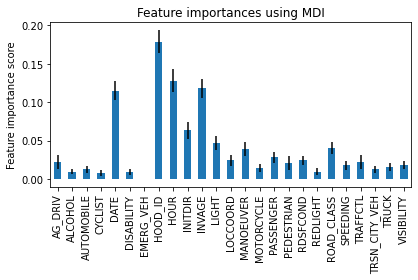

In [48]:
feature_names = list(X.columns) # get feature names
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Feature importance score")
fig.tight_layout()

We observe that the following features are found important:
- feature 1
- feature 2


####  Feature importance based on feature permutation

In [49]:
start_time = time.time()
result = permutation_importance(forest.best_estimator_, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 16.450 seconds


Although the permutation feature importance method **overcomes limitations** of the impurity-based feature importance, it is **more costly.** In permutation feature importance, the features are shuffled n times and the model refitted to estimate the importance of it.

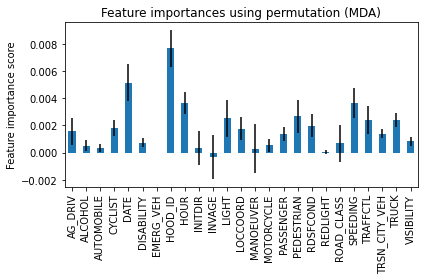

In [50]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation (MDA)")
ax.set_ylabel("Feature importance score")
fig.tight_layout()
plt.show()

We observe that similar features are detected in both methods, although with slight varations.<br>
Features found most important using MDA are:
- feature 1
- feature 2


### Model Evaluation

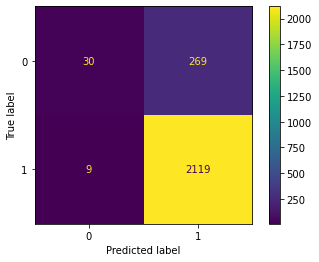

In [51]:
# construct confusion matrix
plot_confusion_matrix(forest.best_estimator_, X_test, y_test)  
plt.show();

We notice that the current Random Forest model classifies the majority of instances as class 1 (Non-fatal) caused perhaps by the imbalanced data.

In [54]:
# evaluate model
y_pred = forest.best_estimator_.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("MODEL", "ACCURACY", "PRECISION", "RECALL", "F1"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:} {2:10} {3:10} {4:10}".format("random forest 1", accuracy, precision, recall, f1))

----------------  ---------  ---------  ---------  ---------
MODEL             ACCURACY   PRECISION  RECALL     F1
----------------  ---------  ---------  ---------  ---------
random forest 1   88.55      87.28      88.55      84.47


## Neural network 1

In [71]:
params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
mlp = MLPClassifier(max_iter=100)
nn = GridSearchCV(mlp, params, n_jobs=-1, cv=3)
nn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [72]:
nn.best_estimator_ # params of best estimator

MLPClassifier(activation='tanh', learning_rate='adaptive', max_iter=100)

### Model Evaluation

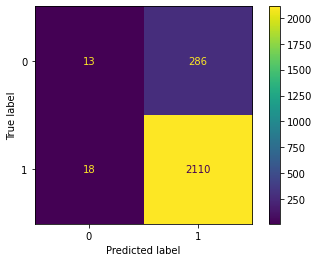

In [73]:
y_pred = nn.best_estimator_.predict(X_test)
plot_confusion_matrix(nn.best_estimator_, X_test, y_test)  
plt.show();

In [75]:
y_pred = nn.best_estimator_.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("MODEL", "ACCURACY", "PRECISION", "RECALL", "F1"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:} {2:10} {3:10} {4:10}".format("neural netwrok 1", accuracy, precision, recall, f1))

----------------  ---------  ---------  ---------  ---------
MODEL             ACCURACY   PRECISION  RECALL     F1
----------------  ---------  ---------  ---------  ---------
neural netwrok 1  87.47      82.38      87.47      82.76


# Undersampling

---


To address the issues generated by the unbalanced dataset, we undersample the dataset to reduce the size of the abundant class (Non-Fatal).

In [128]:
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
X, y = undersample.fit_resample(X, y)

## Data Distribution after Resampling

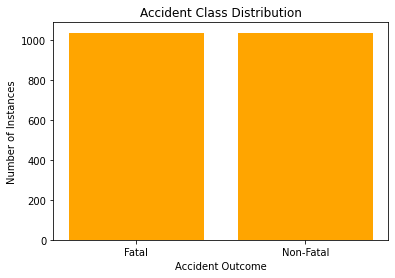

In [94]:
class_counts = y.value_counts()
classes = ['Fatal','Non-Fatal']
class_instance_count = class_counts.values
plt.bar(classes,class_instance_count, color='orange')
plt.title('Accident Class Distribution')
plt.xlabel('Accident Outcome')
plt.ylabel('Number of Instances');

## Models after Resampling

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest 2
Random Forest model using the resampled dataset.

In [96]:
# find best parameters for a random forest and train using best found estimator
params = {
    'n_estimators': [100, 500, 1000],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 5, 10, 13],
    'min_samples_leaf': [1, 2, 5, 8, 13]
}

forest = GridSearchCV(RandomForestClassifier(random_state=0), params)
forest.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 5, 8, 13],
                         'min_samples_split': [2, 4, 5, 10, 13],
                         'n_estimators': [100, 500, 1000]})

In [97]:
forest.best_estimator_ # params of best estimator

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [98]:
start_time = time.time()
importances = forest.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.best_estimator_.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.126 seconds


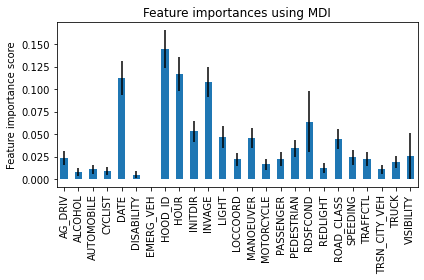

In [99]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Feature importance score")
fig.tight_layout()

In [100]:
start_time = time.time()
result = permutation_importance(forest.best_estimator_, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 68.917 seconds


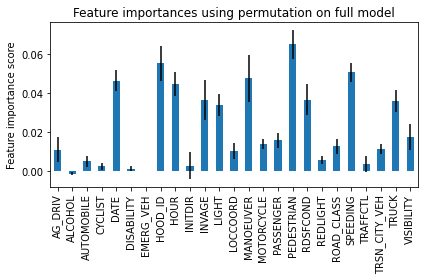

In [101]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Feature importance score")
fig.tight_layout()
plt.show()

#### Model Evaluation

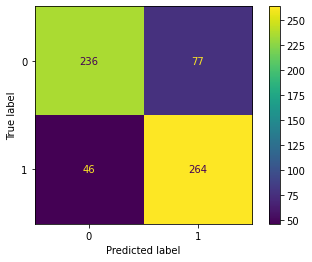

In [102]:
plot_confusion_matrix(forest.best_estimator_, X_test, y_test)  
plt.show();

After undersampling, results seem to be better. Predictions occur for both classes.

In [103]:
y_pred = forest.best_estimator_.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("MODEL", "ACCURACY", "PRECISION", "RECALL", "F1"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:} {2:10} {3:10} {4:10}".format("random forest 2", accuracy, precision, recall, f1))

----------------  ---------  ---------  ---------  ---------
MODEL             ACCURACY   PRECISION  RECALL     F1
----------------  ---------  ---------  ---------  ---------
random forest 2   80.26      80.57      80.26      80.21


### Neural Network 2

In [130]:
params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
mlp = MLPClassifier(max_iter=100)
nn = GridSearchCV(mlp, params, n_jobs=-1, cv=3)
nn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [131]:
nn.best_estimator_ # params of best estimator

MLPClassifier(learning_rate='adaptive', max_iter=100)

#### Model Evaluation

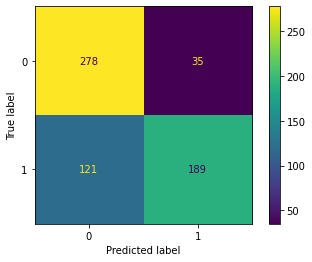

In [132]:
y_pred = nn.best_estimator_.predict(X_test)
plot_confusion_matrix(nn.best_estimator_, X_test, y_test)  
plt.show();

In [133]:
y_pred = nn.best_estimator_.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("MODEL", "ACCURACY", "PRECISION", "RECALL", "F1"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:} {2:10} {3:10} {4:10}".format("neural netwrok 2", accuracy, precision, recall, f1))

----------------  ---------  ---------  ---------  ---------
MODEL             ACCURACY   PRECISION  RECALL     F1
----------------  ---------  ---------  ---------  ---------
neural netwrok 2  74.96      76.99      74.96      74.46


# Feature Reduction

---


We keep only the 12 most influencial features determined using MDA above.

In [166]:
y = df['ACCLASS']

df = df.drop(columns=['ACCLASS', 'AG_DRIV', 'ALCOHOL', 'AUTOMOBILE', 'CYCLIST', 'DISABILITY', 'EMERG_VEH', 'INITDIR', 'LOCCOORD', 'MOTORCYCLE', 'PASSENGER', 'REDLIGHT', 'TRAFFCTL', 'TRSN_CITY_VEH'])
X = df

In [149]:
X

,DATE,HOOD_ID,HOUR,INVAGE,LIGHT,MANOEUVER,PEDESTRIAN,RDSFCOND,ROAD_CLASS,SPEEDING,TRUCK,VISIBILITY
0,8,85,21,3,1,2,0,0,4,0,0,0
1,8,85,21,3,1,2,0,0,4,0,0,0
2,5,1,6,7,4,13,0,0,4,0,0,0
3,7,118,16,8,4,2,0,0,4,0,0,0
4,9,119,15,5,4,2,0,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2071,12,128,17,5,1,2,1,8,4,0,0,5
2072,7,33,21,3,1,2,1,0,4,1,0,0
2073,7,17,7,11,4,2,1,0,3,0,0,0
2074,8,14,11,14,4,13,1,0,5,0,0,0


In [167]:
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
X, y = undersample.fit_resample(X, y)

## Random Forest 3

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [150]:
# find best parameters for a random forest and train using best found estimator
params = {
    'n_estimators': [100, 500, 1000],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 5, 10, 13],
    'min_samples_leaf': [1, 2, 5, 8, 13]
}

forest = GridSearchCV(RandomForestClassifier(random_state=0), params)
forest.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 5, 8, 13],
                         'min_samples_split': [2, 4, 5, 10, 13],
                         'n_estimators': [100, 500, 1000]})

In [151]:
forest.best_estimator_ # params of best estimator

RandomForestClassifier(min_samples_split=4, n_estimators=1000, random_state=0)

### Model Evaluation

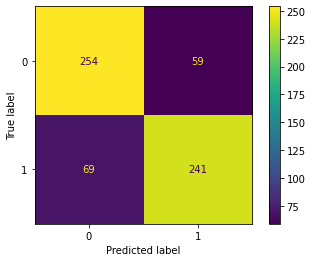

In [152]:
plot_confusion_matrix(forest.best_estimator_, X_test, y_test)  
plt.show();

In [153]:
y_pred = forest.best_estimator_.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("MODEL", "ACCURACY", "PRECISION", "RECALL", "F1"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:} {2:10} {3:10} {4:10}".format("random forest 3", accuracy, precision, recall, f1))

----------------  ---------  ---------  ---------  ---------
MODEL             ACCURACY   PRECISION  RECALL     F1
----------------  ---------  ---------  ---------  ---------
random forest 3   79.45      79.48      79.45      79.45


## Neural Network 3

In [169]:
params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
mlp = MLPClassifier(max_iter=100)
nn = GridSearchCV(mlp, params, n_jobs=-1, cv=3)
nn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [170]:
forest.best_estimator_ # params of best estimator

RandomForestClassifier(min_samples_split=4, n_estimators=1000, random_state=0)

### Model Evaluation

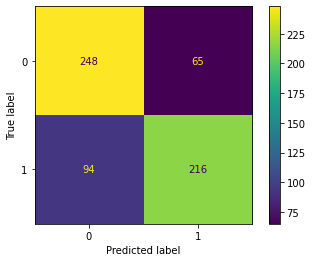

In [172]:
plot_confusion_matrix(nn.best_estimator_, X_test, y_test)  
plt.show();

In [173]:
y_pred = forest.best_estimator_.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("MODEL", "ACCURACY", "PRECISION", "RECALL", "F1"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:} {2:10} {3:10} {4:10}".format("neural network 3", accuracy, precision, recall, f1))

----------------  ---------  ---------  ---------  ---------
MODEL             ACCURACY   PRECISION  RECALL     F1
----------------  ---------  ---------  ---------  ---------
neural network 3  79.45      79.48      79.45      79.45


**NOTE!**<br>
Results are still satisfactory after reducing features from 54 to 12 features!